In [4]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2023-12-06 17:07:58.750060: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 17:07:58.804320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 17:07:58.804359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 17:07:58.805805: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 17:07:58.813924: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 17:08:00.075249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [6]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

In [7]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2023-12-06 17:08:08.700946: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-06 17:08:08.753455: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


TensorShape([60000, 28, 28, 1])

In [8]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [9]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [10]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2317 - accuracy: 0.9302 - val_loss: 0.0859 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0880 - accuracy: 0.9735 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0441 - val_accuracy: 0.9864
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0473 - accuracy: 0.9848 - val_loss: 0.0305 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0283 - val_accuracy: 0.9918


In [11]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9850


[0.049001313745975494, 0.9850000143051147]

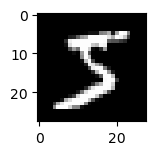

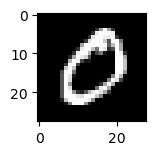

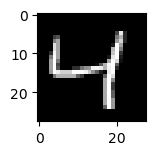

In [12]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [14]:
import os
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['saved_model.pb', 'fingerprint.pb', 'keras_metadata.pb', 'variables', 'assets']


In [15]:
lenet_5_model.save("my.h5")

/users/rayaghil64/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [17]:
json_model = lenet_5_model.to_json()

In [18]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [19]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [20]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-6.06267601e-02,  6.16036318e-02,  6.63367137e-02,
           8.49773660e-02, -1.46428719e-01, -5.99554088e-03]],

        [[ 5.50113283e-02,  3.05172741e-01, -1.50779575e-01,
           2.64993548e-01, -3.48653905e-02,  9.10222009e-02]],

        [[-3.16706859e-02, -9.58753675e-02, -3.89171764e-02,
           3.77790481e-01, -2.48085797e-01,  1.94411799e-01]],

        [[-1.33942828e-01, -2.20994830e-01, -2.80585438e-01,
           9.78212729e-02, -3.10233504e-01,  2.87592113e-01]],

        [[-7.98023939e-02, -6.92119539e-01, -2.48145536e-01,
          -1.37246460e-01, -2.07229376e-01,  2.54120886e-01]]],


       [[[-6.27246648e-02, -3.20631312e-03, -2.10679129e-01,
           1.39472947e-01, -3.13496411e-01,  3.29816312e-01]],

        [[-1.27105758e-01, -1.86316594e-02, -2.18624726e-01,
           5.34482658e-01, -1.53728038e-01,  1.16708845e-01]],

        [[ 3.64249423e-02,  8.86164233e-02, -1.31259218e-01,
           4.55500633e-01, -1.51403502e-01,  9.01053697e-02]],